In [3]:
import json, requests
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.pylab as pylab

In [9]:
def convert_time_format(tf, date): 
    result = list()
    for d in date:
        tmp = time.localtime(int(d))
        r = time.strftime(tf, tmp)
        result.append(r)
    return result


def get_us_stock_data(start, end, freq, code):
    stime = int(time.mktime(time.strptime(start, "%Y %m %d")))
    etime = int(time.mktime(time.strptime(end, "%Y %m %d")))

    url = 'https://query1.finance.yahoo.com/v8/finance/chart/%s?formatted=true&lang=en-US&region=US&period1=%s&period2=%s&interval=%s' % (code, stime, etime, freq)

    resp = requests.get(url=url)
    data = json.loads(resp.text)

    result = dict()

    date = data["chart"]['result'][0]['timestamp']
    result['date'] = convert_time_format("%Y-%m-%d", date)
    result['adjclose'] = data["chart"]['result'][0]['indicators']['adjclose'][0]['adjclose']

    return pd.DataFrame(result).dropna()

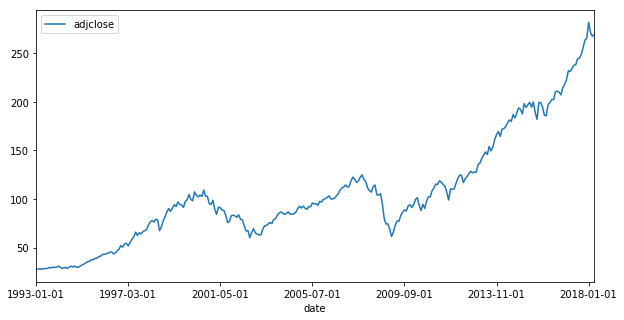

In [10]:
# 시작일 지정
start = "1990 1 1"
# 종료일 지정
end = "2018 3 4"
# 데이터 주기: 1일, 1주, 1달
freq= "1mo" # 1d 1wk
# 종목코드 지정
code = "SPY"

df = get_us_stock_data(start, end, freq, code)
df.set_index('date', inplace=True)
df.plot(figsize = (10,5))
plt.show()